In [182]:
from __future__ import division
from collections import defaultdict
import scipy
import numpy as np
import pickle
import itertools
from dist_rsa.dbm import *
from dist_rsa.utils.load_data import *
from dist_rsa.utils.helperfunctions import *
from dist_rsa.utils.config import abstract_threshold,concrete_threshold
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

# vec_size,vec_kind = 25,'glove.twitter.27B.'
vec_size,vec_kind = 300,'glove.6B.'
# freqs = pickle.load(open('dist_rsa/data/google_freqs/freqs','rb'))
nouns,adjs = get_words(with_freqs=False)
vecs = load_vecs(mean=True,pca=False,vec_length=vec_size,vec_type=vec_kind) 

def l1_model(subj,pred):

    print('abstract_threshold',abstract_threshold)
    print('concrete_threshold',concrete_threshold)

    qud_words = [a for a in list(adjs) if adjs[a] < abstract_threshold and a in vecs]

    quds = sorted(qud_words,\
        key=lambda x:scipy.spatial.distance.cosine(vecs[x],np.mean([vecs[pred],vecs[pred]],axis=0)),reverse=False)
        # key=lambda x:freqs[x],reverse=True)

    noun_words = [n for n in nouns if nouns[n] > concrete_threshold and n in vecs]
    possible_utterances = sorted(noun_words,\
        key=lambda x: scipy.spatial.distance.cosine(vecs[x],np.mean([vecs[subj],vecs[subj]],axis=0)),reverse=False)
        # key=lambda x:freqs[x],reverse=True)


    for x in possible_utterances:
        if x not in vecs:
            # print(x,"not in vecs")
            possible_utterances.remove(x)
            # raise Exception("utterance not in vecs")

    quds = quds[:30]
    possible_utterances = possible_utterances[:1000]

    print("QUDS",quds[:10]) 
    print("UTTERANCES:\n",possible_utterances[:10])


    params = Inference_Params(
        vecs=vecs,
        subject=[subj],predicate=pred,
        quds=quds,
        possible_utterances=list(set(possible_utterances).union(set([pred]))),
        sig1=10.0,sig2=1.0,l1_sig1=10.0,
        qud_weight=0.0,freq_weight=0.0,
        number_of_qud_dimensions=1,
        poss_utt_frequencies=defaultdict(lambda:1),
        qud_frequencies=defaultdict(lambda:1),
        rationality=1.0,
        norm_vectors=False,
        heatmap=False,
        resolution=Resolution(span=10,number=100),
        model_type="discrete_mixture",
        )

    run = Dist_RSA_Inference(params)
    run.compute_l1(load=0,save=False)


    out = run.tf_results
    tf.reset_default_graph()
    return out,params

    # world_means = run.world_samples
    # print(world_means[:5],"MEANS")

    # print(results[:5])

    # if not is_baseline:
    #     worldm = run.world_movement("cosine",comparanda=[x for x in qud_words if x in vecs])
    #     # print("\nworld\n",worldm[:5])
    # else: worldm = None
        # out.write("\nWORLD MOVEMENT:\n")
        # out.write(str(worldm))
    # print("WORLD MOVEMENT WITH PROJECTION\n:",run.world_movement("cosine",comparanda=[x for x in quds if x in vecs],do_projection=True)[:50])
    # print("BASELINE:\n",sorted(qud_words,\
    #     key=lambda x:scipy.spatial.distance.cosine(vecs[x],np.mean([vecs[subj],vecs[pred]],axis=0)),reverse=False)[:5])

    # demarg = demarginalize_product_space(results)
    # print("\ndemarginalized:\n,",demarg[:5])
    # out.write("\ndemarginalized:\n")
    # out.write((str(demarg)))

    # params.number_of_qud_dimensions=1
    # run = Dist_RSA_Inference(params)
    # run.compute_l1(load=0,save=False)
    # results2 = run.qud_results()
    # # print("\n1d results\n",results2[:10])
    # one_d = results2
    # one_d=None

if __name__ == "__main__":

    

    # for x in range(1):
    #     l1_model(("father","shark",0.5,0.5,1.0,0,100,False))
    subj,pred = "man","shark"
    result,params = l1_model(subj=subj,pred=pred)


        # print()


        # print(l1_model(subj="man",pred="swimmer"))

        # print(scipy.spatial.distance.cosine(vecs['man']-means1[0],vecs['man']-means2[0]))
        # worlds,quds=l1_model(("wall","frog",1.0,1.0,1.0,0,1000,True))
        # print(quds[:10])






loading vecs (load vecs): glove.6B.mean_vecs300
abstract_threshold 2.5
concrete_threshold 3.0


  0%|          | 0/30 [00:00<?, ?it/s]

QUDS ['wild', 'rare', 'similar', 'latest', 'prized', 'good', 'famous', 'great', 'mysterious', 'other']
UTTERANCES:
 ['man', 'woman', 'person', 'boy', 'men', 'father', 'girl', 'guy', 'hand', 'brother']
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 10.0 1.0
L1 SIG 10.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 1000 possible utterances and 30
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 30 [['bad'], ['best'], ['common'], ['dangerous'], ['exotic'], ['famous'], ['good'], ['great'], ['latest'], ['likely'], ['lone'], ['mega'], ['mysterious'], ['natural'], ['occasional'], ['other'], ['particular'], ['prized'], ['rare'], ['similar'], ['spectacular'], ['strange'], ['supposed'], ['true'], ['typical'], ['uncommon'], ['unusual'], ['usual'], ['vulnerable'], ['wild']]
quds 30
SIZE,AMOUNT 100 0.1


100%|██████████| 30/30 [02:20<00:00,  4.69s/it]


time: 140.6722252368927
time: 39.94274950027466
time: 16.955578088760376


In [181]:
results

(None, [(['vicious'], 'n/a', 0.61206895), (['swims'], 'n/a', 0.387931)])

(2.6060004662333767, 3.9352563244473613)

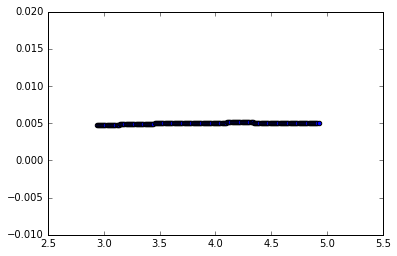

In [179]:
visualize(params,0,100,0.01)

# params.subspace_means[0][0]


In [110]:
params.subspace_prior_means[0][0]
# params.subspace_means[0][0]

3.9352563244473613

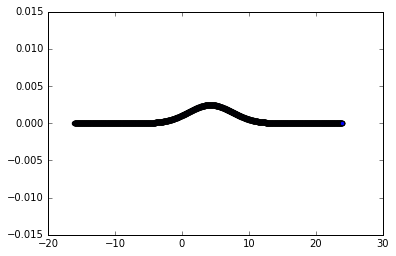

In [106]:
visualize(params,0,1000,0.02)

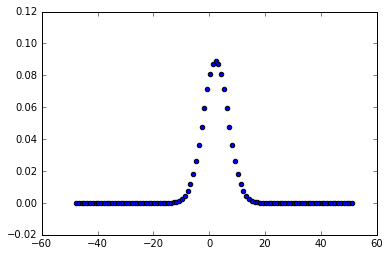

In [39]:
# params.subspace_prior_means.shape
vals = scipy.stats.multivariate_normal.pdf(np.arange(-50,50)+params.subspace_prior_means[3][0],mean=params.subspace_prior_means[3][0],cov=20.0)
hm = matplotlib.pyplot.scatter(x=np.arange(-50,50)+params.subspace_prior_means[3][0],y=vals)


In [162]:
from __future__ import division
from collections import defaultdict
import scipy
import numpy as np
import pickle
import itertools
from dist_rsa.dbm import *
from dist_rsa.utils.load_data import *
from dist_rsa.utils.helperfunctions import *
from dist_rsa.utils.config import abstract_threshold,concrete_threshold
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from dist_rsa.utils.simple_vecs import real_vecs as simple_vecs
import itertools
from dist_rsa.dbm import Resolution




def l1_model(subj,pred,sig1,sig2,l1_sig1,quds,possible_utterances):
    vec_size,vec_kind = 25,'glove.twitter.27B.'

    vecs = simple_vecs
    real_vecs= simple_vecs

    print("UTTERANCES:\n",sorted(list(set(possible_utterances).union(set([pred]))))[:20])

    params = Inference_Params(
        vecs=real_vecs,
        subject=[subj],predicate=pred,
        quds=quds,
        possible_utterances=sorted(list(set(possible_utterances).union(set([pred])))),
        sig1=sig1,sig2=sig2, l1_sig1=l1_sig1,
        qud_weight=0.0,freq_weight=0.0,
        number_of_qud_dimensions=1,
        poss_utt_frequencies=defaultdict(lambda:1),
        qud_frequencies=defaultdict(lambda:1),
        rationality=1.0,
        norm_vectors=False,
        resolution=Resolution(span=2.5,number=100),
        model_type="discrete_mixture",
        heatmap=False
        )

    run = Dist_RSA_Inference(params)
    run.compute_l1(load=0,save=False)
    tf_results = run.tf_results
    return tf_results,params

if __name__ == "__main__":

    results,params = l1_model(subj="man",pred="shark",sig1=5.0,sig2=0.5,l1_sig1=5.0,quds=["vicious","swims"],possible_utterances=["shark","swimmer","man"])


  0%|          | 0/2 [00:00<?, ?it/s]

UTTERANCES:
 ['man', 'shark', 'swimmer']
RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate shark
SIGs 1&2: 5.0 0.5
L1 SIG 5.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['swims']


 50%|█████     | 1/2 [00:05<00:05,  5.68s/it]

CURRENT QUD: ['vicious']


100%|██████████| 2/2 [00:10<00:00,  5.32s/it]


time: 10.64478874206543
time: 3.659334421157837
marginal means [0.39038097 1.26821486]
time: 1.9187841415405273


In [171]:
def visualize(params,line,res,c):

    cond_probs = np.zeros((len(params.quds), res.size*2))
    for qud_index in range(len(params.quds)):

        subspace_mean,subspace_prior_mean,subspace_variance = params.subspace_means[line][qud_index],params.subspace_prior_means[line][qud_index],params.subspace_variances[line][qud_index]

        vals=scipy.stats.multivariate_normal.pdf((np.arange(-res.size,res.size)*res.amount),mean=subspace_mean,cov=subspace_variance)
        cond_probs[qud_index]=vals
        
#         print(scipy.stats.multivariate_normal.pdf([1,2,3],mean=subspace_mean,cov=subspace_variance))
#         print(vals.shape)
#         print(subspace_mean)
#         print("CHECK",np.sum((np.arange(-size,size)*scale+subspace_prior_mean)*vals))

#     print(params.subspace_means.shape)
#     print(params.subspace_means)
    marginal_mean = np.sum(params.subspace_means[line]*params.qud_marginals)
    print("marginal mean",marginal_mean)
    marginal = np.sum(cond_probs*np.expand_dims(params.qud_marginals,1),axis=0)
#     print("CHECK1",np.sum(marginal),marginal.shape)
#     marginal /= np.sum(marginal)
#     print("CHECK2",np.sum(marginal),marginal.shape)
    hm = matplotlib.pyplot.scatter(c=c,x=(np.arange(-res.size,res.size)*res.amount),y=marginal)
#     hm_2 = matplotlib.pyplot.scatter(x=(np.arange(-size,size)*scale)+params.subspace_prior_means[line][0],y=marginal)
#     print(params.qud_marginals)
#     print("should be equal",np.mean(marginal),marginal_means[line])
    return marginal,marginal_mean,params.subspace_prior_means[line][0]
#     return marginal_means[line]*np.exp(params.qud_marginals)

RESOLUTION. SIZE: 100 AMOUNT: 0.05
marginal mean 0.3903809711318722
marginal mean 1.2682148581132253


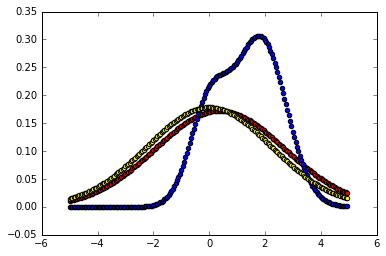

In [172]:
res = Resolution(5,100)
_,_,_ = visualize(params,0,res,'red')
_,_,_ = visualize(params,1,res,'blue')

#PRIOR
vals = scipy.stats.multivariate_normal.pdf(np.arange(-res.size,res.size)*res.amount,mean=params.subspace_prior_means[0][0],cov=5.0)
hm = matplotlib.pyplot.scatter(c='yellow',x=np.arange(-res.size,res.size)*res.amount,y=vals)
